### Computing coherences 

Here we will use a toy model to test our functions to compute coherence

In [7]:
%matplotlib inline

import numpy                 as np
import matplotlib.pyplot     as plt
from   GDa.spectral_analysis import spectral

In [8]:
# Model we will use from Dhamala et. al., (2008)
def ar_model_dhamala(N=5000, Trials = 10, Fs = 200, C=0.2, t_start=0, t_stop=None, cov = None):
    T = N / Fs
    time = np.linspace(0, T, N)

    X = np.random.random([Trials, N])
    Y = np.random.random([Trials, N])

    def interval(t, t_start, t_stop):
        if t_stop==None:
            return (t>=t_start)
        else:
            return (t>=t_start)*(t<=t_stop)

    for i in range(Trials):
        E = np.random.multivariate_normal(np.zeros(cov.shape[0]), cov, size=(N,))
        for t in range(2, N):
            X[i,t] = 0.55*X[i,t-1] - 0.8*X[i,t-2] + interval(time[t],t_start,t_stop)*C*Y[i,t-1] + E[t,0]
            Y[i,t] = 0.55*Y[i,t-1] - 0.8*Y[i,t-2] +E[t,1]

    Z = np.zeros([2, Trials, N])

    Z[0] = X
    Z[1] = Y

    return Z

#### Single trial

In this example X is coupled to Y (Y$\rightarrow$X), but the coupling is turned of at t = 2.25 s. We will compute the transforms and the coherence for only one trial first.

In [9]:
# Generating signals
N  = 900      # Number of observations
Fs = 200      # Sampling frequency
dt = 1.0 / Fs # Time resolution
C  = 0.25     # Coupling parameter
Trials = 100  # Number of trials

freqs = np.arange(0.1,100,.1)

cov = np.array([ [1.00, 0.00],
                 [0.00, 1.00] ])
Z = ar_model_dhamala(N=N, Trials = Trials, C=C, Fs=Fs, t_start=0, t_stop=2.25, cov=cov)
Z = np.swapaxes(Z, 0, 1)
X = np.squeeze(Z[0,0,:])
Y = np.squeeze(Z[0,1,:])

In [10]:
# Instantiating spectral class
spec = spectral()

In [11]:
# Computing wavelets
Wx_morlet     = spec.spectogram(signal = X[np.newaxis,np.newaxis,:], fs = Fs, n_cycles = freqs/2.0,
                               freqs = freqs, method = 'morlet', n_jobs = -1)
Wx_multitaper = spec.spectogram(signal = X[np.newaxis,np.newaxis,:], fs = Fs, n_cycles = freqs/2.0,
                               time_bandwidth = 8.0, freqs =freqs,  method = 'multitaper', n_jobs = -1)

Wy_morlet     = spec.spectogram(signal = Y[np.newaxis,np.newaxis,:], fs = Fs, n_cycles = freqs/2.0,
                               freqs = freqs, method = 'morlet', n_jobs = -1)
Wy_multitaper = spec.spectogram(signal = Y[np.newaxis,np.newaxis,:], fs = Fs, n_cycles = freqs/2.0,
                               time_bandwidth = 8.0, freqs =freqs,  method = 'multitaper', n_jobs = -1)

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    2.2s finished


In [12]:
'''
def smoothwavelet(wave,dt,period,dj,scale):
    
    n = wave.shape[1]
    twave = np.zeros_like(wave)
    
    npdar = 2 * np.ceil(np.log2(n))
    
    k = np.arange(1,np.fix(npad/2.0))
    k = k * ((2*np.pi)/npad)
    k = [0, k, -k[np.fix(npad-1)/2]::-1]
    k2 = k**2
    snorm = scale/dt
    
    for i in range(0, wave.shape[0]):
        F = np.exp(-0.5*(snorm[i]**2)*k2)
        smooth = np.fft.ifft(F*np.fft.fft(wave[i,:]), nfft=npad)
        #twave[i,:]=
        
    if np.isreal(wave):
        twave = np.real(twave)
        
    dj0 = 0.6
    dj0steps=dj0/(dj*2)
    
    kernel = np.concatenate((np.mod(dj0step,1), np.ones([2*np.round(dj0steps)-1,1]) ))
    kernel = np.concatenate((kernel,np.mod(dj0steps,1)))/(2*np.round(dj0steps)-1+2*np.mod(dj0steps,1))
    return scipy.signal.convolve2d(twave,kernel, mode='same')
'''

"\ndef smoothwavelet(wave,dt,period,dj,scale):\n    \n    n = wave.shape[1]\n    twave = np.zeros_like(wave)\n    \n    npdar = 2 * np.ceil(np.log2(n))\n    \n    k = np.arange(1,np.fix(npad/2.0))\n    k = k * ((2*np.pi)/npad)\n    k = [0, k, -k[np.fix(npad-1)/2]::-1]\n    k2 = k**2\n    snorm = scale/dt\n    \n    for i in range(0, wave.shape[0]):\n        F = np.exp(-0.5*(snorm[i]**2)*k2)\n        smooth = np.fft.ifft(F*np.fft.fft(wave[i,:]), nfft=npad)\n        #twave[i,:]=\n        \n    if np.isreal(wave):\n        twave = np.real(twave)\n        \n    dj0 = 0.6\n    dj0steps=dj0/(dj*2)\n    \n    kernel = np.concatenate((np.mod(dj0step,1), np.ones([2*np.round(dj0steps)-1,1]) ))\n    kernel = np.concatenate((kernel,np.mod(dj0steps,1)))/(2*np.round(dj0steps)-1+2*np.mod(dj0steps,1))\n    return scipy.signal.convolve2d(twave,kernel, mode='same')\n"

In [38]:
width = 500
import scipy
# Computing spectra
Wx_morlet     = np.squeeze(Wx_morlet)
Wx_multitaper = np.squeeze(Wx_multitaper) 
Wy_morlet     = np.squeeze(Wy_morlet)
Wy_multitaper = np.squeeze(Wy_multitaper)
Wxy_morlet    = Wx_morlet * np.conj(Wy_morlet)
Wxy_multitaper= Wx_multitaper * np.conj(Wy_multitaper) 

kernel = np.ones([width, 1])

Sxx_morlet     = Wx_morlet*np.conj(Wx_morlet)#np.squeeze( np.multiply(Wx_morlet, np.conj(Wx_morlet)) ).real
Sxx_morlet     = scipy.signal.convolve2d(Sxx_morlet.T, kernel, mode='same').T
Sxx_multitaper = Wx_multitaper*np.conj(Wx_multitaper)#np.squeeze( np.multiply(Wx_multitaper, np.conj(Wx_multitaper)) ).real
Sxx_multitaper = scipy.signal.convolve2d(Sxx_multitaper.T, kernel, mode='same').T

Syy_morlet     = Wy_morlet*np.conj(Wy_morlet)#np.squeeze( np.multiply(Wy_morlet, np.conj(Wy_morlet)) ).real
Syy_morlet     = scipy.signal.convolve2d(Syy_morlet.T, kernel, mode='same').T
Syy_multitaper = Wy_multitaper*np.conj(Wy_multitaper)#np.squeeze( np.multiply(Wy_multitaper, np.conj(Wy_multitaper)) ).real
Syy_multitaper = scipy.signal.convolve2d(Syy_multitaper.T, kernel, mode='same').T

Sxy_morlet     = Wx_morlet*np.conj(Wy_morlet)
Sxy_morlet     = scipy.signal.convolve2d(Sxy_morlet.T, kernel, mode='same').T
Sxy_multitaper = Wx_multitaper*np.conj(Wy_multitaper)
Sxy_multitaper = scipy.signal.convolve2d(Sxy_multitaper.T, kernel, mode='same').T

In [14]:
Sxy_multitaper

array([[ 1.00185709+0.83647005j,  1.00911299+0.85492196j,
         1.0183129 +0.86914727j, ...,  1.29499539+0.19983189j,
         1.27569701+0.20199814j,  1.25671791+0.20564542j],
       [ 1.01590918+1.70277607j,  1.02245553+1.74039227j,
         1.03403088+1.76978372j, ...,  1.36048385+0.42893105j,
         1.34028222+0.43319703j,  1.32136841+0.44045324j],
       [ 1.05210388+2.62125233j,  1.05716741+2.67927509j,
         1.07227733+2.72553978j, ...,  1.47241219+0.70926731j,
         1.45092842+0.71549653j,  1.4321781 +0.72626401j],
       ...,
       [ 5.21511797-1.61424171j,  5.21085237-1.6078588j ,
         5.20029573-1.60194313j, ..., -0.43092475+0.69111924j,
        -0.4409893 +0.69094572j, -0.46040918+0.69486808j],
       [ 5.30737239-1.09009503j,  5.3028371 -1.08568993j,
         5.29183277-1.08164516j, ..., -0.38117723+0.45891913j,
        -0.39074629+0.45871447j, -0.41020417+0.46132612j],
       [ 5.36410095-0.54930672j,  5.35940008-0.54705819j,
         5.34812809-0.54500513

Text(0.5, 0, 'Time [s]')

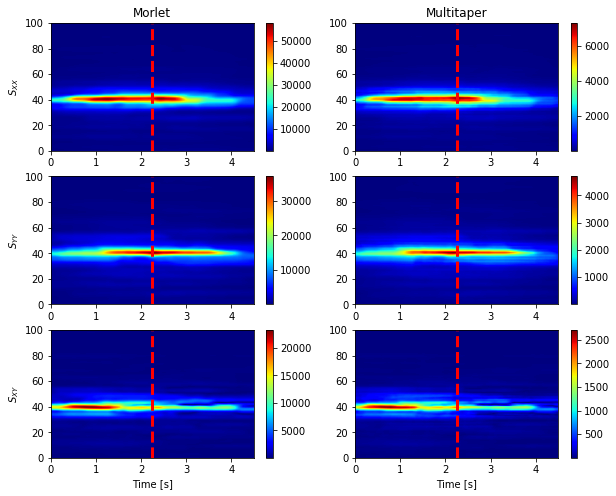

In [39]:
plt.figure(figsize = (10,8))
plt.subplot(3,2,1)
plt.imshow(Sxx_morlet.real, aspect = 'auto', cmap = 'jet', origin = 'lower', extent=[0,dt*900,0.1,100]); plt.colorbar()
plt.title('Morlet')
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)
plt.ylabel('$S_{XX}$')
plt.subplot(3,2,2)
plt.imshow(Sxx_multitaper.real, aspect = 'auto', cmap = 'jet', origin = 'lower', extent=[0,dt*900,0.1,100]); plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)
plt.title('Multitaper')
plt.subplot(3,2,3)
plt.imshow(Syy_morlet.real, aspect = 'auto', cmap = 'jet', origin = 'lower', extent=[0,dt*900,0.1,100]); plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)
plt.ylabel('$S_{YY}$')
plt.subplot(3,2,4)
plt.imshow(Syy_multitaper.real, aspect = 'auto', cmap = 'jet', origin = 'lower', extent=[0,dt*900,0.1,100]); plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)
plt.subplot(3,2,5)
plt.imshow(np.abs(Sxy_morlet), aspect = 'auto', cmap = 'jet', origin = 'lower', extent=[0,dt*900,0.1,100]); plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)
plt.xlabel('Time [s]')
plt.ylabel('$S_{XY}$')
plt.subplot(3,2,6)
plt.imshow(np.abs(Sxy_multitaper), aspect = 'auto', cmap = 'jet', origin = 'lower', extent=[0,dt*900,0.1,100]); plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)
plt.xlabel('Time [s]')

Now let's compute the coherence

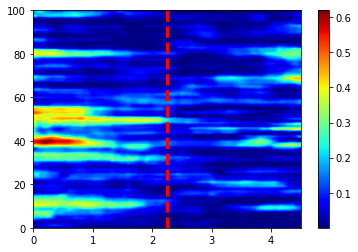

In [40]:
coh = Sxy_multitaper*np.conj(Sxy_multitaper)/ (Sxx_multitaper * Syy_multitaper)
plt.imshow(coh.real, aspect='auto', cmap='jet', origin='lower', extent=[0,dt*900,0.1,100]);plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)

In [ ]:
coh.min()

In [ ]:
C_morlet = spec.coherence(signal1 = X[np.newaxis,np.newaxis,:], signal2 = Y[np.newaxis,np.newaxis,:], fs = Fs, 
                          freqs = freqs, n_cycles = freqs/2.0, 
                          time_bandwidth = None, method = 'morlet', n_jobs = -1)

C_multitaper = spec.coherence(signal1 = X[np.newaxis,np.newaxis,:], signal2 = Y[np.newaxis,np.newaxis,:], fs = Fs, 
                          freqs = freqs, n_cycles = freqs/2.0, 
                          time_bandwidth = 8.0, method = 'multitaper', n_jobs = -1)

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.imshow(np.squeeze(C_morlet.real), aspect = 'auto', cmap = 'jet', origin = 'lower', extent=[0,dt*900,0.1,100])
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3); plt.colorbar()
plt.title('Morlet')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.subplot(1,2,2)
plt.imshow(np.squeeze(C_multitaper.real), aspect = 'auto', cmap = 'jet', origin = 'lower', extent=[0,dt*900,0.1,100])
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3); plt.colorbar()
plt.title('Multitaper')
plt.xlabel('Time [s]')

In [9]:
np.squeeze(Wx_morlet).shape

(999, 900)

In [9]:
import mne.time_frequency

In [10]:
out = mne.time_frequency.tfr_array_multitaper(Z, Fs, freqs, n_cycles=freqs/2.0, 
                                        zero_mean=True, time_bandwidth=8.0, use_fft=True, 
                                        decim=1, output='complex', n_jobs=-1, verbose=None)

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of   2 | elapsed:   50.8s remaining:    0.0s
[Parallel(n_jobs=40)]: Done   2 out of   2 | elapsed:   50.8s finished


In [11]:
out.shape

(100, 2, 999, 900)

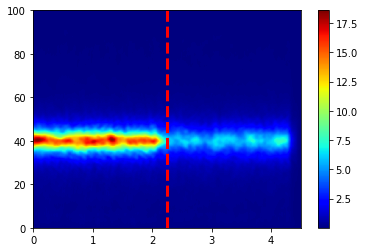

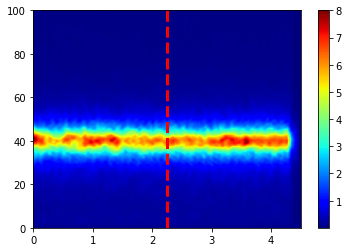

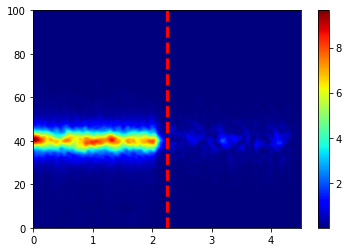

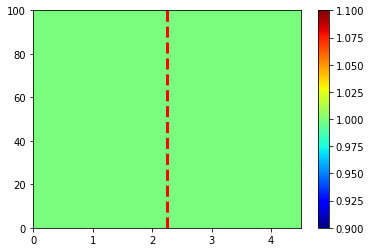

In [12]:
S = np.zeros([Trials, 4, len(freqs), N]) * (1 + 1j)
for i in range(Trials):
    Wx = out[i,0,:,:]
    Wy = out[i,1,:,:]

    S[i,0,:,:] = np.multiply(Wx, np.conj(Wx)) 
    S[i,1,:,:] = np.multiply(Wy, np.conj(Wy))
    S[i,2,:,:] = np.multiply(Wx, np.conj(Wy))
    S[i,3,:,:] = np.abs( S[i,2,:,:] )**2/ (S[i,0,:,:].real * S[i,1,:,:].real)

plt.figure()
plt.imshow(S[:,0,:,:].mean(axis=0).real, aspect='auto', cmap='jet', origin='lower', extent=[0,dt*900,0.1,100]);plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)
plt.figure()
plt.imshow(S[:,1,:,:].mean(axis=0).real, aspect='auto', cmap='jet', origin='lower', extent=[0,dt*900,0.1,100]);plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)
plt.figure()
plt.imshow(np.abs( S[:,2,:,:].mean(axis=0) ), aspect='auto', cmap='jet', origin='lower', extent=[0,dt*900,0.1,100]);plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)
plt.figure()
plt.imshow(S[:,3,:,:].mean(axis=0).real, aspect='auto', cmap='jet', origin='lower', extent=[0,dt*900,0.1,100]);plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)

In [13]:
coh = np.abs( S[:,2,:,:].mean(axis=0) )**2 / (S[:,0,:,:].mean(axis=0).real * S[:,1,:,:].mean(axis=0).real)

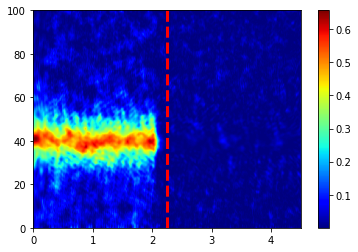

In [15]:
plt.imshow(coh, aspect='auto', cmap='jet', origin='lower', extent=[0,dt*900,0.1,100]);plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)

In [22]:
coh.shape

(999, 900)

In [ ]:
plt.imshow(S[:,3,:,:].mean(axis=0).real, aspect='auto', cmap='jet', origin='lower', extent=[0,dt*900,0.1,100]);plt.colorbar()
plt.vlines(2.25, 0.1, 100, colors='r', linestyles='--', lw=3)

In [37]:
S[10,3,:,:].real.max()

1.0000000000000009

In [20]:
Sxx_morlet

array([[3.138984  +0.j, 3.34834219+0.j, 3.5531291 +0.j, ...,
        0.02748482+0.j, 0.02837661+0.j, 0.02872655+0.j],
       [3.13149227+0.j, 3.3397841 +0.j, 3.54341398+0.j, ...,
        0.02785807+0.j, 0.02869563+0.j, 0.02899786+0.j],
       [3.11906654+0.j, 3.32559089+0.j, 3.52730324+0.j, ...,
        0.02847675+0.j, 0.02922457+0.j, 0.02944784+0.j],
       ...,
       [0.0073834 +0.j, 0.00705649+0.j, 0.00650459+0.j, ...,
        0.08338515+0.j, 0.07415784+0.j, 0.06577273+0.j],
       [0.00705922+0.j, 0.0066742 +0.j, 0.00605549+0.j, ...,
        0.08401246+0.j, 0.07476232+0.j, 0.0663476 +0.j],
       [0.00686551+0.j, 0.00644565+0.j, 0.00578687+0.j, ...,
        0.08439052+0.j, 0.07512662+0.j, 0.06669407+0.j]])

In [21]:

kernel = scipy.signal.morlet(width)#np.ones([width, 1])

In [28]:
kernel.reshape([600,1]).shape

(600, 1)

In [31]:
kernel

array([[ 2.00946966e-09+2.46089976e-24j],
       [ 2.27949430e-09+2.39988325e-10j],
       [ 2.55601722e-09+5.44234460e-10j],
       [ 2.83199390e-09+9.21816602e-10j],
       [ 3.09836157e-09+1.38208207e-09j],
       [ 3.34375585e-09+1.93442577e-09j],
       [ 3.55422160e-09+2.58800559e-09j],
       [ 3.71292532e-09+3.35138640e-09j],
       [ 3.79987869e-09+4.23210460e-09j],
       [ 3.79168485e-09+5.23614512e-09j],
       [ 3.66132151e-09+6.36732379e-09j],
       [ 3.37797739e-09+7.62656872e-09j],
       [ 2.90696141e-09+9.01109600e-09j],
       [ 2.20970678e-09+1.05134769e-08j],
       [ 1.24389489e-09+1.21205963e-08j],
       [-3.62729837e-11+1.38125063e-08j],
       [-1.67962578e-09+1.55611807e-08j],
       [-3.73736139e-09+1.73291836e-08j],
       [-6.26213904e-09+1.90682700e-08j],
       [-9.30688866e-09+2.07179416e-08j],
       [-1.29232998e-08+2.22039901e-08j],
       [-1.71599527e-08+2.34370693e-08j],
       [-2.20600556e-08+2.43113441e-08j],
       [-2.76587542e-08+2.47032766